# Salary prediction and EDA. Data Science Jobs.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import datetime as dt
import warnings
import plotly.graph_objects as go
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

## 1. Extracting

In [7]:
# Loading data
data = pd.read_csv('../datasets/data_science/ds_salaries.csv')

In [8]:
# Data information
data.info()
#print(data.describe())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


## 2. Transform

In [9]:
# Deleting useless column
data = data.drop('Unnamed: 0',axis=1)
# Checking for nulls or duplicates
print('Nulls:\n' + str(data.isna().sum()))
print('\nDuplicates: ' + str(data.duplicated().sum()))
# Deleting duplicates
data.drop_duplicates(inplace=True)

Nulls:
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

Duplicates: 42


## 3. Data statistics

In [10]:
# Correlation between atributes
#print(data.corr())
fig=px.imshow(data.corr(),text_auto=True,height=600,width=600,template='ggplot2',aspect='auto',title='Correlation of attributes', color_continuous_scale='reds')
fig.show()

In [11]:
# To read clearly the results
data['experience_level'].replace({'EN':'Entry','MI':'Mid','EX':'Executive','SE':'Senior'}, inplace=True)
# Boxploy of salaries in usd by experience
px.box(data,x='experience_level', y='salary_in_usd', color='experience_level', template='ggplot2',labels={'experience_level':'Experience','salary_in_usd':'Salary in USD'},title='Data Science salaries by experience')

In [12]:
# To read clearly the results
data['employment_type'].replace({'PT':'Part Time','FT':'Full Time','CT':'Contract','FL':'Freelance'}, inplace=True)
# Boxploy of salaries in usd by employment type
px.box(data,x='employment_type', y='salary_in_usd', color='employment_type', template='ggplot2',labels={'employment_type':'Experience','salary_in_usd':'Salary in USD'},title='Data Science salaries by employment type')

## 4. Exploratory Analysis

In [13]:
px.violin(data,x='work_year',y='salary_in_usd',color='work_year',labels={'work_year':'year','salary_in_usd':'salary in usd'},template='seaborn',title='Data Science salaries by work year')

In [14]:
data_=data['job_title'].value_counts().head(12)
fig=px.bar(data_,x=data_.index,y=data_.values,text=data_.values,labels={'index':'Job Title','y':'Number of jobs','text':'count'},template='seaborn',title='Top 12 Roles in Data Science')
fig.show()

In [15]:
data_ = data.groupby('job_title',as_index=False)['salary_in_usd'].mean().sort_values(by='salary_in_usd',ascending=False)
data_['salary_in_usd']=round(data_['salary_in_usd'],2)
fig=px.bar(data_.head(12),x='job_title',y='salary_in_usd',labels={'job_title':'Job Title','salary_in_usd':'Avg salary in USD'},text='salary_in_usd',template='seaborn',title='Top 12 Roles in Data Science based on average salaries')
fig.show()

## 5. Data preprocessing

First, we label ordinal features in order to use this data within the prediction model.

In [16]:
df = data
df.company_size = df.company_size.replace({'S':1 ,'M': 2, 'L': 3})
df['remote_ratio'] = df['remote_ratio'].replace({100: 3, 50: 2, 0: 1})
df['experience_level'] = df['experience_level'].replace({'Entry': 1, 'Mid': 2, 'Senior': 3, 'Executive': 4})
df['employment_type'] = df['employment_type'].replace({'Freelance':1 ,'Part Time': 2, 'Full Time': 3, 'Contract': 4,})
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,2,3,Data Scientist,70000,EUR,79833,DE,1,DE,3
1,2020,3,3,Machine Learning Scientist,260000,USD,260000,JP,1,JP,1
2,2020,3,3,Big Data Engineer,85000,GBP,109024,GB,2,GB,2
3,2020,2,3,Product Data Analyst,20000,USD,20000,HN,1,HN,1
4,2020,3,3,Machine Learning Engineer,150000,USD,150000,US,2,US,3


The target variable is the salary in USD. It is important to check the distribution of this variable.
In the image below, we see that it is not a Gaussian distribution.

In [17]:
import plotly.express as px
import plotly.figure_factory as ff

# How is the target variable distributed
hist_data = [df['salary_in_usd']]
group_labels = ['salary_in_usd']
fig = ff.create_distplot(hist_data, group_labels, show_hist=False)
fig.update_layout(title = 'Distribution of the salary in USD')
fig.layout.template = 'seaborn'
fig.show()

Salary for specific combinations of year of employment, experience level, job type, job title, employee residence, remote ratio, company location and company size, this implementation provides those statistics summarized in new columns of the DataFrame. New employees data coming to model will be getting this features from the group of similar employees they belong based on their characteristics. <br>
*Font: https://www.kaggle.com/vedatgul*

In [18]:
# Forming groups
group = ['work_year','experience_level', 'employment_type', 'job_title', 'employee_residence', 'remote_ratio','company_location','company_size']
# Mean_Salary, min_salary, max_salary for jobs with same features
df['GroupMeanSalary'] = df.groupby(group)['salary_in_usd'].transform('mean')
df['GroupMinSalary'] = df.groupby(group) ['salary_in_usd'].transform('min')  
df['GroupMaxSalary'] = df.groupby(group) ['salary_in_usd'].transform('max')

In [19]:
# Applying one-hot codification to categorical data
dummies = pd.get_dummies(df['job_title'], dtype=int)
df = pd.concat([df, dummies], axis=1)
df.drop('job_title', axis=1, inplace=True)
# Deleting strings
df.drop(['salary_currency','employee_residence', 'company_location'], axis=1, inplace=True)

df.head()

,work_year,experience_level,employment_type,salary,salary_in_usd,remote_ratio,company_size,GroupMeanSalary,GroupMinSalary,GroupMaxSalary,3D Computer Vision Researcher,AI Scientist,Analytics Engineer,Applied Data Scientist,Applied Machine Learning Scientist,BI Data Analyst,Big Data Architect,Big Data Engineer,Business Data Analyst,Cloud Data Engineer,Computer Vision Engineer,Computer Vision Software Engineer,Data Analyst,Data Analytics Engineer,Data Analytics Lead,Data Analytics Manager,Data Architect,Data Engineer,Data Engineering Manager,Data Science Consultant,Data Science Engineer,Data Science Manager,Data Scientist,Data Specialist,Director of Data Engineering,Director of Data Science,ETL Developer,Finance Data Analyst,Financial Data Analyst,Head of Data,Head of Data Science,Head of Machine Learning,Lead Data Analyst,Lead Data Engineer,Lead Data Scientist,Lead Machine Learning Engineer,ML Engineer,Machine Learning Developer,Machine Learning Engineer,Machine Learning Infrastructure Engineer,Machine Learning Manager,Machine Learning Scientist,Marketing Data Analyst,NLP Engineer,Principal Data Analyst,Principal Data Engineer,Principal Data Scientist,Product Data Analyst,Research Scientist,Staff Data Scientist
0,2020,2,3,70000,79833,1,3,79833.0,79833,79833,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2020,3,3,260000,260000,1,1,260000.0,260000,260000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,2020,3,3,85000,109024,2,2,109024.0,109024,109024,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2020,2,3,20000,20000,1,1,20000.0,20000,20000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,2020,3,3,150000,150000,2,3,150000.0,150000,150000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [20]:
# Matriz de correlacion
import plotly.graph_objects as go
import plotly.express as px

fig = px.imshow(df.corr(),text_auto=True,height=600,width=600,template='ggplot2',aspect='auto',title='Correlation of attributes', color_continuous_scale='purples')
fig.show()

## 6. Regression

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X = df

# Target variable and normalization
X = df.drop(['salary_in_usd'], axis=1)
y = df['salary_in_usd']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalization
#scaler = StandardScaler()
#Xtrain = scaler.fit_transform(Xtrain)
#Xtest = scaler.transform(Xtest)





### 6.1 Linear Regression

Determination coefficient:  0.9056317287811475
Pearson correlation coefficient:  0.9518884239961698


Text(0, 0.5, 'Predicted values')

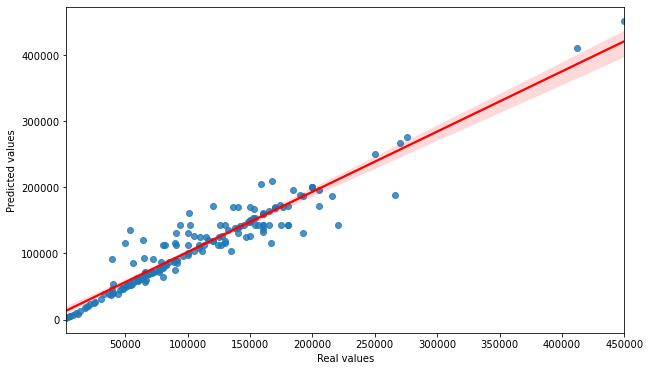

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics as mt

# Creating the model
lm = LinearRegression()

# Training the model
lm.fit(Xtrain, ytrain)

# Prediction
predicted_y = lm.predict(Xtest)

# Metrics to evaluate the model
print('Determination coefficient: ', mt.r2_score(ytest, predicted_y))
pearson_corr = np.corrcoef(ytest, predicted_y)[0, 1]
print('Pearson correlation coefficient: ', pearson_corr)

import matplotlib.pyplot as plt
import seaborn as sns

# Real values against predicted values
plt.figure(figsize=(10,6))
sns.regplot(x = ytest, y = predicted_y, line_kws={'color': 'red'})
plt.xlabel('Real values')
plt.ylabel('Predicted values')

### 6.2 Lasso regression

Determination coefficient:  0.9056342850793629
Pearson correlation coefficient:  0.9518895571126258


Text(0, 0.5, 'Predicted values')

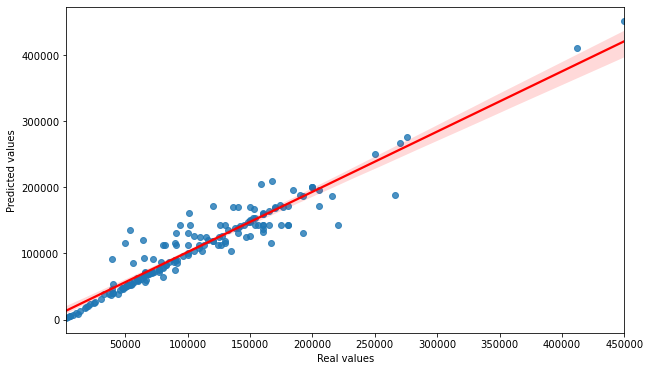

In [23]:
from sklearn.linear_model import Lasso
from sklearn import metrics as mt

# Crea el modelo de regresión Lasso
lasso_model = Lasso(alpha=0.01, random_state=42)

# Entrena el modelo
lasso_model.fit(Xtrain, ytrain)

# Realiza predicciones en el conjunto de prueba
predicted_y = lasso_model.predict(Xtest)

# Metrics to evaluate the model
print('Determination coefficient: ', mt.r2_score(ytest, predicted_y))
pearson_corr = np.corrcoef(ytest, predicted_y)[0, 1]
print('Pearson correlation coefficient: ', pearson_corr)

import matplotlib.pyplot as plt
import seaborn as sns

# Real values against predicted values
plt.figure(figsize=(10,6))
sns.regplot(x = ytest, y = predicted_y, line_kws={'color': 'red'})
plt.xlabel('Real values')
plt.ylabel('Predicted values')

### 6.3 Random Forest Regressor

Determination coefficient:  0.9934101497738762
Pearson correlation coefficient:  0.996955660356924


Text(0, 0.5, 'Predicted values')

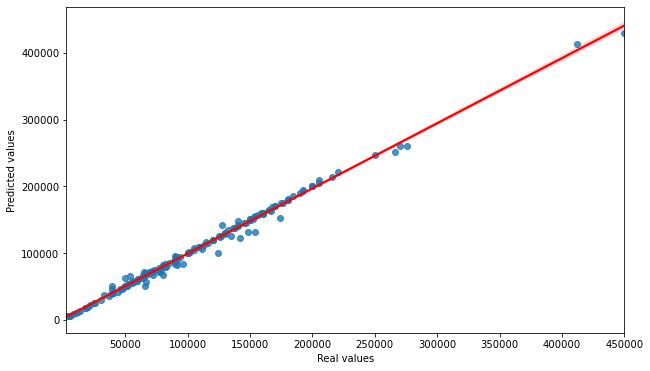

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics as mt

# Creating the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Training the model
rf.fit(Xtrain, ytrain)

# Prediction
predicted_y = rf.predict(Xtest)

# Metrics to evaluate the model
print('Determination coefficient: ', mt.r2_score(ytest, predicted_y))
pearson_corr = np.corrcoef(ytest, predicted_y)[0, 1]
print('Pearson correlation coefficient: ', pearson_corr)

import matplotlib.pyplot as plt
import seaborn as sns

# Real values against predicted values
plt.figure(figsize=(10,6))
sns.regplot(x = ytest, y = predicted_y, line_kws={'color': 'red'})
plt.xlabel('Real values')
plt.ylabel('Predicted values')

### 6.4 Decision Tree Regressor

Determination coefficient:  0.9892877309060265
Pearson correlation coefficient:  0.9946858497851908


Text(0, 0.5, 'Predicted values')

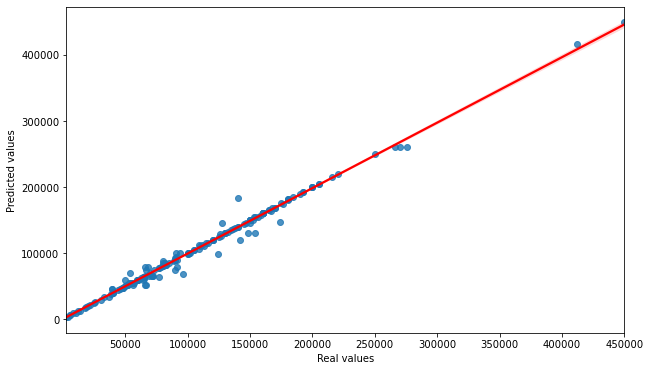

In [25]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics as mt

# Crear the model
dt = DecisionTreeRegressor(random_state=42)

# Training the model
dt.fit(Xtrain, ytrain)

# Predictions
predicted_y = dt.predict(Xtest)

# Metrics to evaluate the model
print('Determination coefficient: ', mt.r2_score(ytest, predicted_y))
pearson_corr = np.corrcoef(ytest, predicted_y)[0, 1]
print('Pearson correlation coefficient: ', pearson_corr)

import matplotlib.pyplot as plt
import seaborn as sns

# Real values against predicted values
plt.figure(figsize=(10,6))
sns.regplot(x = ytest, y = predicted_y, line_kws={'color': 'red'})
plt.xlabel('Real values')
plt.ylabel('Predicted values')